In [25]:
import numpy as np
import pandas as pd
import pprint
import os.path

crime = pd.read_csv('Denver_crime _CLEANED.csv',encoding="ISO-8859-1")
housing = pd.read_csv('new_data.csv')
del housing[housing.columns[0]]
neighborhoods_crime = set(crime['NEIGHBORHOOD_ID'])
neighborhoods_crime = list(neighborhoods_crime)
# print(len(neighborhoods_crime))

neighborhoods_housing = set(housing['Neighborhood'])
neighborhoods_housing = list(neighborhoods_housing)

for i in range(len(neighborhoods_housing)):
    tmp = neighborhoods_housing[i]
    tmp = tmp.lower()
    tmp = tmp.replace(" ","-")
    neighborhoods_housing[i] = tmp

# print(len(neighborhoods_housing))

same = []

for neigh in neighborhoods_housing:
    if neigh in neighborhoods_crime:
        same.append(neigh)


In [26]:
from csv import writer
same_house = ['Skyland', 'West Colfax', 'University Hills', 'Washington Virginia Vale', 'Country Club', 'Rosedale', 'Clayton', 'Valverde', 'Congress Park', 'Mar Lee', 'Globeville', 'Sloan Lake', 'Overland', 'Indian Creek', 'Barnum', 'Fort Logan', 'Lowry Field', 'Montbello', 'Barnum West', 'Washington Park', 'Hale', 'Hampden South', 'Platt Park', 'Hampden', 'City Park', 'University Park', 'Virginia Village', 'Cherry Creek', 'Cole', 'Villa Park', 'Bear Valley', 'Capitol Hill', 'Lincoln Park', 'Montclair', 'Marston', 'East Colfax', 'South Park Hill', 'Speer', 'Harvey Park South', 'Harvey Park', 'Baker', 'City Park West', 'North Capitol Hill', 'Sunnyside', 'Wellshire', 'Hilltop', 'Regis', 'Auraria', 'Whittier', 'North Park Hill', 'Goldsmith', 'Berkeley', 'Highland', 'Ruby Hill', 'West Highland', 'Union Station', 'Civic Center', 'Westwood', 'Jefferson Park', 'Northeast Park Hill', 'Belcaro', 'Central Park', 'Windsor', 'Cheesman Park', 'Athmar Park', 'Southmoor Park', 'Chaffee Park', 'University', 'Five Points', 'Elyria Swansea', 'Washington Park West']

months = ['Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2017, 2018,2019,2020,2021,2022]
avgs = {}
headers = ['Neighborhood', 'Year', 'Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for neigh in same_house:
    tmp_df = housing[housing['Neighborhood'] == neigh]
    tmp_year_dict = {}
    for year in years:
        tmp_year_df = tmp_df[tmp_df['Year'] == year]
        tmp_month_dict = {}
        for month in months:
            month_data = tmp_year_df[month]
            avg_month = int(np.average(month_data))
            tmp_month_dict[month] = avg_month
        tmp_year_dict[str(year)] = tmp_month_dict
    avgs[neigh] = tmp_year_dict

In [27]:
months = ['Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2017, 2018,2019,2020,2021,2022]
headers = ['Neighborhood', 'Year', 'Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

if os.path.exists('house_avgs.csv'):
    print("File exist, not running")
    exit

with open('house_avgs.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(headers)
        f_object.close()

for neigh, year in avgs.items():
    for yr, month in year.items():
        neigh = neigh.lower()
        neigh = neigh.replace(" ", "-")
        List = [neigh,yr]
        for mon, val in month.items():
            List.append(val)
        with open('house_avgs.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()

File exist, not running


In [28]:
same_neigh = same

reported_dates = list(crime['REPORTED_DATE'])
incident_id = list(crime['incident_id'])
incident_id = [int(x) for x in incident_id]
neighborhoods_crime_all = list(crime['NEIGHBORHOOD_ID'])

month_conv = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
              5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
              9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
reported_dates_conv = []
reported_years = []
for reported_date in reported_dates:
    tmp_date = reported_date.split()
    tmp_date = tmp_date[0]
    tmp_date = tmp_date.split("/")
    tmp_month = tmp_date[0]
    tmp_year = tmp_date[2]
    tmp_month = month_conv[int(tmp_month)]
    reported_dates_conv.append(tmp_month)
    reported_years.append(tmp_year)


In [29]:
import copy
tmp_d = {'Jan': 0, 'Feb': 0, 'Mar': 0, 'Apr': 0,
         'May': 0, 'Jun': 0, 'Jul': 0, 'Aug': 0,
        'Sep': 0, 'Oct': 0, 'Nov': 0, 'Dec': 0 }

tmp_a = {'2017': copy.deepcopy(tmp_d), '2018': copy.deepcopy(tmp_d), '2019': copy.deepcopy(tmp_d),
         '2020': copy.deepcopy(tmp_d), '2021': copy.deepcopy(tmp_d), '2022': copy.deepcopy(tmp_d)}

crime_dict = dict.fromkeys(neighborhoods_crime, 0)
years = ['2017', '2018','2019','2020','2021','2022']

for neigh, empty_dict in crime_dict.items():
    for yr in years:
        crime_dict[neigh] = copy.deepcopy(tmp_a)

In [30]:
for i in range(len(reported_dates_conv)):
    neigh = str(neighborhoods_crime_all[i])
    year = str(reported_years[i])
    month = str(reported_dates_conv[i])
    if neigh == "nan":
        continue
    crime_dict[neigh][year][month] += 1

for neighborhood in neighborhoods_crime:
    if neighborhood not in same:
        del crime_dict[neighborhood]

In [31]:
months = ['Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2017, 2018,2019,2020,2021,2022]
headers = ['Neighborhood', 'Year', 'Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

if os.path.exists('crime_avgs.csv'):
    print("File exist, not running")
    exit

with open('crime_avgs.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(headers)
        f_object.close()

for neigh, year in crime_dict.items():
    List = [neigh]
    for yr, month in year.items():
        List = [neigh, yr]
        for mon, val in month.items():
            List.append(val)
        with open('crime_avgs.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()


File exist, not running


['cherry-creek', 2017, 0.08110197898268737, 0.0979020979020979, 0.0303030303030303]
['cherry-creek', 2018, -0.0378789183524586, -0.14010529366766927, -0.10687334289668038]
['cherry-creek', 2019, 0.35300263750562194, 0.2605698416254795, 0.1705887719063863]
['cherry-creek', 2020, 0.2872265247940194, 0.28772106938722664, 0.1846372364689991]
['cherry-creek', 2021, -0.21670570811716094, 0.16931875282065012, 0.1563263498701806]
['cherry-creek', 2022, 0.24529162508462582, -0.22616111767687025, -0.1733627549641017]


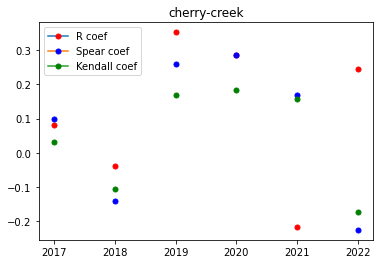

['washington-park', 2017, 0.5490503223739478, 0.47719591995930266, 0.3692744729379982]
['washington-park', 2018, 0.19780708279445064, 0.05253948512537597, 0.04580286124143444]
['washington-park', 2019, -0.169243006411191, -0.22928581111129703, -0.12506107989614448]
['washington-park', 2020, 0.6232439826814591, 0.6503496503496504, 0.4848484848484848]
['washington-park', 2021, 0.10261666620302913, 0.024604911409560833, -0.015508070173307844]
['washington-park', 2022, 0.239486835765177, -0.2998352914532346, -0.21885688981825283]


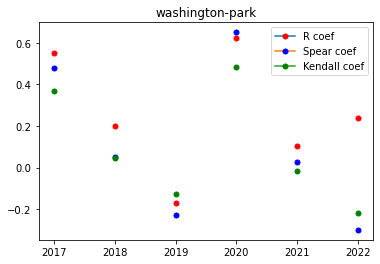

['auraria', 2017, -0.3663879937495377, -0.4096732451993513, -0.34815531191139565]
['auraria', 2018, nan, nan, nan]
['auraria', 2019, 0.07101379116533814, 0.0770837298555973, 0.06629126073623882]
['auraria', 2020, -0.17055525715931738, -0.07721980009364028, -0.06681531047810609]
['auraria', 2021, 0.6254767556581406, 0.5794143242988912, 0.497468338163091]
['auraria', 2022, -0.11172603313203949, -0.532025316581271, -0.5357583756107197]


/Users/seto2103/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/seto2103/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


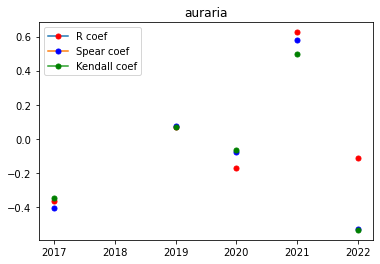

['washington-virginia-vale', 2017, 0.7119325920660038, 0.364914527027702, 0.24618298195866545]
['washington-virginia-vale', 2018, 0.1302457285417426, 0.25874125874125875, 0.2121212121212121]
['washington-virginia-vale', 2019, -0.3154269364890867, -0.06666707705313787, 0.06154574548966636]
['washington-virginia-vale', 2020, -0.407490015096377, -0.3537658665108649, -0.13740858372430334]
['washington-virginia-vale', 2021, -0.09799085099103796, -0.035149873442229765, -0.015508070173307844]
['washington-virginia-vale', 2022, 0.2799616501716593, 0.02816971260815995, 0.04652421051992354]


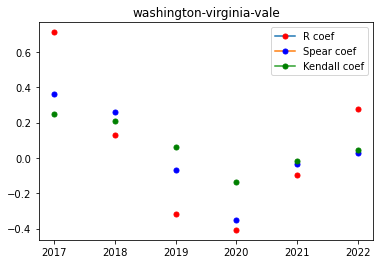

['city-park-west', 2017, 0.3196489820975945, 0.18213688176797005, 0.13740858372430334]
['city-park-west', 2018, 0.670567849398031, 0.6223776223776225, 0.5151515151515151]
['city-park-west', 2019, -0.21464292461269927, -0.28772106938722664, -0.1846372364689991]
['city-park-west', 2020, -0.11459959638131581, 0.02816971260815995, 0.015508070173307844]
['city-park-west', 2021, 0.43631663078275756, 0.4238185133446995, 0.3511552695176641]
['city-park-west', 2022, 0.08541730537294284, -0.11972127858467979, -0.04652421051992354]


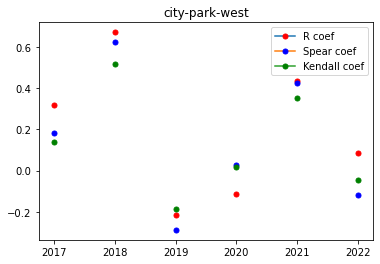

['regis', 2017, -0.0015993005045064623, -0.19683929127648667, -0.1705887719063863]
['regis', 2018, 0.42377388330355154, 0.3076923076923077, 0.1818181818181818]
['regis', 2019, -0.44578406992717606, -0.5739578943912589, -0.40644850966246954]
['regis', 2020, -0.18008302259746845, -0.2816971260815995, -0.25012215979228897]
['regis', 2021, -0.32372930888818835, -0.2206658375265791, -0.22901430620717222]
['regis', 2022, 0.5224754934650511, 0.7367714488443264, 0.5720775535473553]


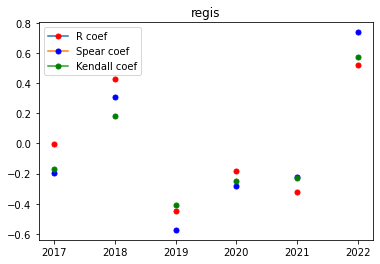

['barnum-west', 2017, -0.09919736018081232, -0.09859399412855982, -0.07754035086653924]
['barnum-west', 2018, -0.17085790174459686, -0.12631656704805072, -0.09231861823449955]
['barnum-west', 2019, -0.34258342267051467, -0.3737246479645134, -0.28603877677367767]
['barnum-west', 2020, 0.004376003458369415, 0.07054948034193756, 0.06253053994807224]
['barnum-west', 2021, 0.3078515840055626, 0.14059949376891906, 0.10855649121315493]
['barnum-west', 2022, 0.4495115801790874, 0.518538680513241, 0.3439179697143973]


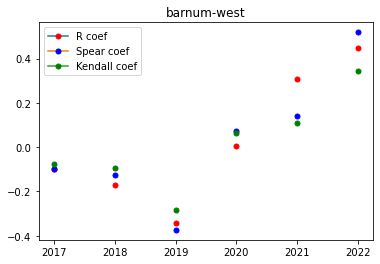

['goldsmith', 2017, -0.02583431575213771, 0.04553422044199251, 0.04580286124143444]
['goldsmith', 2018, -0.03070893603417424, 0.1541158230344362, 0.10687334289668038]
['goldsmith', 2019, 0.24144188468779085, 0.2561419276252139, 0.21541010921383227]
['goldsmith', 2020, 0.7914410322433003, 0.8021028062474066, 0.6565076777938937]
['goldsmith', 2021, 0.2533556961066179, 0.3636363636363637, 0.2727272727272727]
['goldsmith', 2022, 0.4444877337467879, 0.354645607710671, 0.3178208630818641]


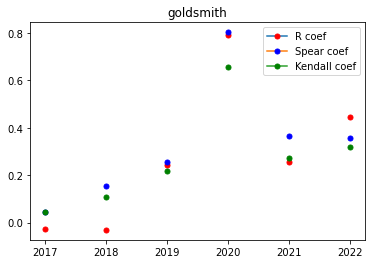

['westwood', 2017, 0.1681820314913779, -0.1328671328671329, -0.2121212121212121]
['westwood', 2018, 0.2466329171571618, 0.1120842349341354, 0.07633810206905742]
['westwood', 2019, 0.49685532659196097, 0.7062937062937064, 0.4545454545454545]
['westwood', 2020, -0.12540902682409655, 0.028070348232900152, 0.06154574548966636]
['westwood', 2021, 0.21984100483227126, 0.143607926009361, 0.07633810206905742]
['westwood', 2022, 0.48656098936764974, 0.542266967707079, 0.38770175433269616]


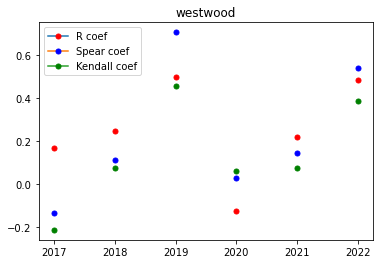

In [43]:
import matplotlib.pyplot as plt
import scipy.stats
crime_dataframe = pd.read_csv('crime_avgs.csv')
housing_dataframe = pd.read_csv('house_avgs.csv')

cor = []
n_t = ['cherry-creek', 'washington-park', 'auraria',
       'washington-virginia-vale', 'city-park-west', 'regis',
       'barnum-west', 'goldsmith', 'westwood']

years = [2017, 2018,2019,2020,2021,2022]

for n in n_t:
    tmp_crime = crime_dataframe[crime_dataframe['Neighborhood'] == n]
    tmp_housing = housing_dataframe[housing_dataframe['Neighborhood'] == n]
    r = []
    s = []
    k = []
    for year in years:
        tmp_crime_year = tmp_crime[tmp_crime["Year"] == str(year)]
        tmp_housing_year = tmp_housing[tmp_housing["Year"] == str(year)]
        tmp_crime_year = tmp_crime_year.values.tolist()[0][2:]
        tmp_housing_year = tmp_housing_year.values.tolist()[0][2:]
        tmp_housing_year = [int(x) for x in tmp_housing_year]
        tmp_crime_year = [int(x) for x in tmp_crime_year]
        pearson = scipy.stats.pearsonr(tmp_crime_year, tmp_housing_year)
        spear = scipy.stats.spearmanr(tmp_crime_year, tmp_housing_year)
        kendall = scipy.stats.kendalltau(tmp_crime_year, tmp_housing_year)
        r.append(pearson)
        s.append(spear)
        k.append(kendall)
        cor.append([n, year, pearson[0],spear[0],kendall[0]])
        print([n, year, pearson[0],spear[0],kendall[0]])
        plt.plot(year, pearson[0], marker="o", markersize=5,markerfacecolor="red",markeredgecolor="red")
        plt.plot(year, spear[0], marker="o", markersize=5,markerfacecolor="blue",markeredgecolor="blue")
        plt.plot(year, kendall[0], marker="o", markersize=5,markerfacecolor="green",markeredgecolor="green")
    plt.title(n)
    plt.legend(["R coef","Spear coef","Kendall coef"])
    plt.show()
